# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


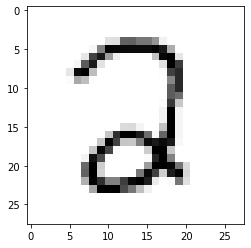

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.25236291117140286
train accuracy is: 0.5844600233683859, test accuracy is 0.5776209677419355


Epoch 10 Loss 0.10775742238029529
train accuracy is: 0.9121181772658988, test accuracy is 0.9178427419354839


Epoch 20 Loss 0.05989860200181366
train accuracy is: 0.9399933233183108, test accuracy is 0.9516129032258065


Epoch 30 Loss 0.04530119721084728
train accuracy is: 0.9515940577532966, test accuracy is 0.9586693548387096


Epoch 40 Loss 0.038748506757037726
train accuracy is: 0.957269237189117, test accuracy is 0.9606854838709677


Epoch 50 Loss 0.03501493240392062
train accuracy is: 0.9607744950759473, test accuracy is 0.9632056451612904


Epoch 60 Loss 0.03256888711806124
train accuracy is: 0.9631113336671674, test accuracy is 0.9652217741935484


Epoch 70 Loss 0.030775058535088964
train accuracy is: 0.9646970455683526, test accuracy is 0.9657258064516129


Epoch 80 Loss 0.02937841492902537
train accuracy is: 0.9661992989484226, test accuracy is 0.9667338709677419


Epoch 90 Loss 0.02823078959883082
train accuracy is: 0.9674511767651477, test accuracy is 0.9672379032258065


Epoch 100 Loss 0.027266586033055727
train accuracy is: 0.9682857619762978, test accuracy is 0.9682459677419355


Epoch 110 Loss 0.026436286621081728
train accuracy is: 0.9689534301452178, test accuracy is 0.96875


Epoch 120 Loss 0.025691357465542516
train accuracy is: 0.9697045568352529, test accuracy is 0.96875


Epoch 130 Loss 0.025027888265959003
train accuracy is: 0.9704556835252879, test accuracy is 0.9692540322580645


Epoch 140 Loss 0.02442353439199086
train accuracy is: 0.971290268736438, test accuracy is 0.9692540322580645


Epoch 150 Loss 0.023864742820641452
train accuracy is: 0.971874478384243, test accuracy is 0.9692540322580645


Epoch 160 Loss 0.02334736938344829
train accuracy is: 0.9725421465531631, test accuracy is 0.9692540322580645


Epoch 170 Loss 0.022857763857883632
train accuracy is: 0.9736271073276581, test accuracy is 0.9702620967741935


Epoch 180 Loss 0.022393818670925155
train accuracy is: 0.9740443999332332, test accuracy is 0.9702620967741935


Epoch 190 Loss 0.021949479307841132
train accuracy is: 0.9747120681021533, test accuracy is 0.9702620967741935


Epoch 200 Loss 0.02152934922583998
train accuracy is: 0.9751293607077283, test accuracy is 0.969758064516129


Epoch 210 Loss 0.021124744177159007
train accuracy is: 0.9754631947921882, test accuracy is 0.969758064516129


Epoch 220 Loss 0.020727115046338333
train accuracy is: 0.9760474044399933, test accuracy is 0.9702620967741935


Epoch 230 Loss 0.020345974682173678
train accuracy is: 0.9763812385244534, test accuracy is 0.9702620967741935


Epoch 240 Loss 0.019966253039842414
train accuracy is: 0.9771323652144884, test accuracy is 0.9702620967741935


0.01580180307635636

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2624919310902977
train accuracy is: 0.6231847771657486, test accuracy is 0.6376008064516129


Epoch 10 Loss 0.10681849517621166
train accuracy is: 0.9043565348022033, test accuracy is 0.9198588709677419


Epoch 20 Loss 0.08147389317564886
train accuracy is: 0.9229677850108496, test accuracy is 0.9390120967741935


Epoch 30 Loss 0.06991964004826849
train accuracy is: 0.9339843097980304, test accuracy is 0.9475806451612904


Epoch 40 Loss 0.06299828483941988
train accuracy is: 0.9402436988816558, test accuracy is 0.9516129032258065


Epoch 50 Loss 0.05828724447861589
train accuracy is: 0.9435820397262561, test accuracy is 0.953125


Epoch 60 Loss 0.05483097662475875
train accuracy is: 0.9464196294441662, test accuracy is 0.9576612903225806


Epoch 70 Loss 0.05216619273614046
train accuracy is: 0.9477549657820064, test accuracy is 0.9601814516129032


Epoch 80 Loss 0.05003213255451342
train accuracy is: 0.9490068435987314, test accuracy is 0.9606854838709677


Epoch 90 Loss 0.04827627923741061
train accuracy is: 0.9511767651477215, test accuracy is 0.9601814516129032


Epoch 100 Loss 0.046798480339596625
train accuracy is: 0.9523451844433317, test accuracy is 0.9611895161290323


Epoch 110 Loss 0.045532393633185814
train accuracy is: 0.9532632281755967, test accuracy is 0.9606854838709677


Epoch 120 Loss 0.0444330128209328
train accuracy is: 0.9543481889500918, test accuracy is 0.9611895161290323


Epoch 130 Loss 0.04346657513517297
train accuracy is: 0.9555166082457018, test accuracy is 0.9627016129032258


Epoch 140 Loss 0.04260687450868966
train accuracy is: 0.9557669838090469, test accuracy is 0.9632056451612904


Epoch 150 Loss 0.0418360572645028
train accuracy is: 0.9559339008512769, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.041140498935116385
train accuracy is: 0.956851944583542, test accuracy is 0.9652217741935484


Epoch 170 Loss 0.04050751960048498
train accuracy is: 0.957352695710232, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.03992876312169526
train accuracy is: 0.9577699883158071, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.03939672448846733
train accuracy is: 0.958103822400267, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.038905135816734826
train accuracy is: 0.9588549490903021, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.03844901651162522
train accuracy is: 0.9588549490903021, test accuracy is 0.9657258064516129


Epoch 220 Loss 0.03802339971838578
train accuracy is: 0.9594391587381071, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.03762761362531851
train accuracy is: 0.9598564513436821, test accuracy is 0.9657258064516129


Epoch 240 Loss 0.037255088333711654
train accuracy is: 0.9600233683859122, test accuracy is 0.9667338709677419


0.06725529264580997

### Comparing results of NN and LR

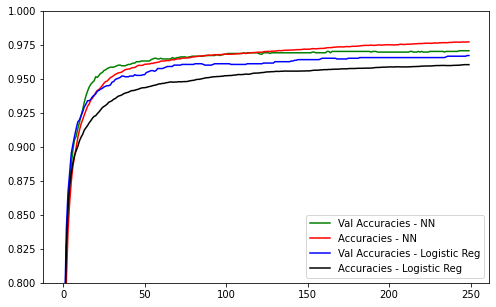

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

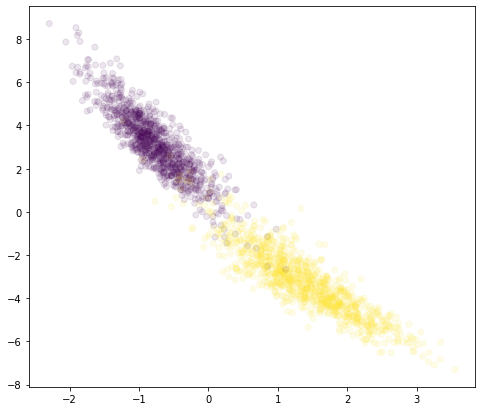

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

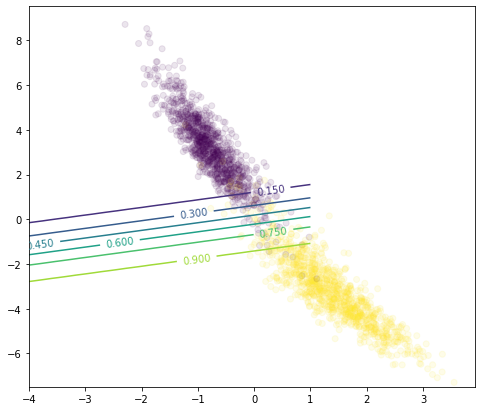

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );